# E-tivity 3: Linear regression
## MSc in AI - CE6002 & CS5062
Student Name: Michel Danjou

Student ID: 18263461

In [1]:
%reset
%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.utils import shuffle
import pandas as pd

# Task 4  (CE6002)
#### *Copy your linear classification algorithm to the notebook Etivity3_LinearRegression.ipynb available in the git repository. Change your linear classification algorithm to make it suitable for linear regression. Use this to obtain the best possible classification of the data set Task4.csv. Your classification performance should improve if you add some new features.*
  

In [3]:
# Load the data
data = pd.read_csv("Task4.csv") 

In [4]:
data.head()

,X,y
0,0.0000,-0.3080
1,0.0101,-0.3470
2,0.0202,-0.0937
3,0.0303,-0.2860
4,0.0404,-0.0927


In [5]:
data.describe()

,X,y
count,100.000000,100.000000
mean,0.499995,0.786404
std,0.293037,0.396402
min,0.000000,-0.347000
25%,0.250250,0.639750
50%,0.500000,0.928000
75%,0.749750,1.075000
max,1.000000,1.270000


In [6]:
def linear_regression(X, y):
    X_inverse = np.linalg.pinv(X)
    w_lin = np.matmul(X_inverse, y)
    return w_lin


def calc_polynom(weights, X):
    h = weights[0]
    for i in np.arange(1, len(weights)):
        h += weights[i]*X ** i    
    return h 


def calc_square_error(a, b):
    e_sq = 0
    N = len(a)
    for i in range(N):
        e_sq += math.pow((a[i] - b[i]),2)
    return math.sqrt(e_sq/N)


def calculate_and_plot_linear_regression(X, y):
    
    # shuffle data
    X, y = shuffle(X, y, random_state=0)

    # split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Linear regression
    weights = linear_regression(X_train, y_train)
    
    # Plot test data
    plt.scatter(X[:,1], y, c=y)

    # Plot decision boundary
    minx = np.amin(X)
    maxx = np.amax(X)  
    s = len(X[:,1])
    x_line = np.linspace(minx, maxx, s)
    y_line = calc_polynom(weights, x_line)
    plt.plot(x_line, y_line)
    
    # yhat (multiply yhat by 2 so that, when plotted, it doesn't overlap with scatter plot of X)
    yhat = X_test.dot(weights)
    plt.scatter(X_test[:,1], np.sign(yhat)*2, c=y_test)
    
    # error
    error = calc_square_error(y_test,  yhat)
    
    # Marker for center point at coordinates (0,0)
    plt.plot([0], [0], marker='x', markersize=30, color="red")

    print("weights:", weights)
    print("error  :", error)

    return weights, yhat, error


### Linear regression on X

weights: [0.40020625 0.78768555]
error  : 0.31209137924705527


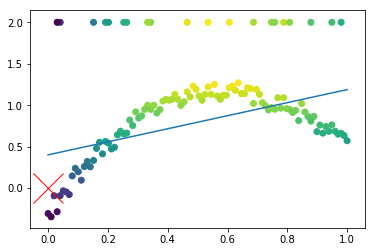

In [7]:
myX = data['X'].values
myY = data['y'].values

bias = np.ones(len(myX))
newX =  np.vstack((bias,myX))
newXt = newX.T

weights, yhat, error = calculate_and_plot_linear_regression(newXt, myY.T)


The misclassification error is **high at 31%**

### Linear regression on X,X square

bias.shape : (100,)
newX.shape : (2, 100)
newX2.shape: (3, 100)
weights: [-0.27898341  4.87767293 -4.09764044]
error  : 0.07732257093813867


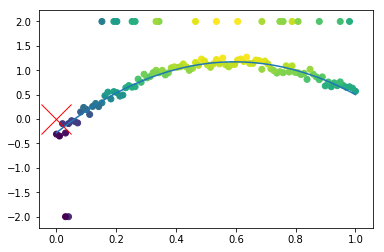

In [8]:
myX = data['X'].values
myY = data['y'].values

myX2 = np.square(myX)
myY2 = np.square(myY)

bias = np.ones(len(myX))
newX =  np.vstack((bias,myX))
newX2 =  np.vstack((newX,myX2))

print("bias.shape :", bias.shape)
print("newX.shape :", newX.shape)
print("newX2.shape:", newX2.shape)
newXt = newX2.T

weights, yhat, error = calculate_and_plot_linear_regression(newXt, myY.T)


The **misclassifiacation error is very low at 0.07** when using a **Xsquare in combination with X**.

Reference: https://github.com/pickus91/Polynomial-Regression-From-Scratch/blob/master/polynomial_regression.py 

<span style="color:red">Should we plot ysquare???</span>  


#### *Also, use an algorithm from the scikit-learn toolbox to see if you can do better. You should not add any other imports than those necessary for your chosen scikit-learn algorithm.*

<span style="color:red">TBD</span>  


Score: 0.4645382880058122


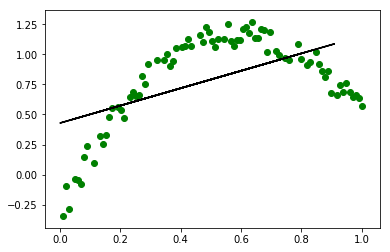

In [9]:
# LinearRegression expects an array of shape (n, 1) for the "Training data"
newX = data['X'].values[:,np.newaxis]

# target data is array of shape (n,) 
newy = data['y'].values

X_train, X_test, y_train, y_test = train_test_split(newX, newy, test_size=0.2, random_state=42)

model2 = LinearRegression()
model2.fit(X_train, y_train)
score = model2.score(X_test, y_test)

plt.scatter(X_train, y_train,color='g')
plt.plot(X_test, model2.predict(X_test),color='k')

print("Score:", score)
plt.show()

Text(0.5,1,'Polynomial Degree = 2')

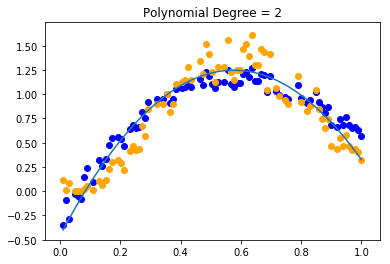

In [13]:
# Reference: 
# https://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions
# https://www.jeremyjordan.me/polynomial-regression/

y2 = y_train**2

degree = 2

poly_features = PolynomialFeatures(degree)  
X_poly = poly_features.fit_transform(X_train)
poly_model = LinearRegression()  
poly_model.fit(X_poly, y2)

pred = poly_model.predict(X_poly)
new_X, new_y = zip(*sorted(zip(X_train, pred))) # sort values for plotting

# plot 
plt.plot(new_X, new_y)

# plot original data
plt.scatter(X_train,y_train, c='blue')

# plot data raised to the chosen power (2)
plt.scatter(X_train,y2, c='orange')

plt.title("Polynomial Degree = "+ str(degree))

#score = poly_model.score(X_test, y_test)
#print("Score:", score)

<span style="color:red">How to plot the score ???</span>  
